# 대한민국 인구 분석
- 인구소멸 위기 지역 파악 및 지도 표현
- 지도 표현에 대한 카르토그램 표현

---
## 2. 인구현황 데이터 정리
- 인구현황 데이터 : data/data07/07_population_raw_data.xlsx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib import font_manager, rc

warnings.filterwarnings(action="ignore")
get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

rc("font", family="Arial Unicode MS")

### 데이터 불러오기

In [3]:
population = pd.read_excel("../data/data07/07_population_raw_data.xlsx")

population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12
0,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,전국,소계,총인구수 (명),51696216,3541061,3217367,3517868,4016272,2237345,1781229,1457890,909130,416164,141488,34844,17562
2,NaN,NaN,남자인구수 (명),25827594,1877127,1682988,1806754,2045265,1072395,806680,600607,319391,113221,32695,7658,4137
3,NaN,NaN,여자인구수 (명),25868622,1663934,1534379,1711114,1971007,1164950,974549,857283,589739,302943,108793,27186,13425
4,서울특별시,소계,총인구수 (명),9930616,690728,751973,803507,817467,448956,350580,251961,141649,66067,24153,7058,5475


- 행정구역(동읍면)별(1), 행정구역(동읍면)별(2), 항목 행 안에 연도, 나이별 컬럼 행이 들어가있다.
- 첫번째 행(연도) 이후 행부터 불러오면 나이별 컬럼이 첫번째 행이 된다.

In [4]:
population = pd.read_excel("../data/data07/07_population_raw_data.xlsx", header=1)

population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


- NaN 값이 포함된 데이터는 fillna(method='pad') 기능을 통해, NaN값을 이전 행의 값으로 대체시켜주자

In [5]:
population.fillna(method='pad', inplace=True)

population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


### 컬럼명 변경

- 행정구역(동읍면)별(1), 행정구역(동읍면)별(2), 계, 항목 컬럼명을 변경해주자

In [6]:
population.rename(
    columns={
        "행정구역(동읍면)별(1)" : "광역시도",
        "행정구역(동읍면)별(2)" : "시도",
        "계" : "인구수",
        "항목" : "구분"
    }, inplace=True
)

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


### 불필요한 데이터 제거
- 시도 컬럼의 소계 값 제거

In [7]:
population = population[population['시도'] != '소계']

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


### 데이터 이름 변경
- 총인구수 (명), 남자인구수 (명), 여자인구수 (명) 이름 변경

In [8]:
population.loc[population['구분'] == '총인구수 (명)', '구분'] = "합계"
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = "남자"
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = "여자"

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


### 소멸지역 조사를 위한 나이 데이터 정리
- 인구소멸 위험 지수 : 만 20~39세 여성 인구수 / (만 65세 이상 고령 인구수 / 2)
- 이를 계산하기 위해 20~39세 여성 컬럼으로 나이 구분을 합치고, 65세 이상 인구 구분을 합치는 작업

In [9]:
population["20~39세"] = (
    population["20 - 24세"] +
    population["25 - 29세"] +
    population["30 - 34세"] +
    population["35 - 39세"]
)

population["65세이상"] = (
    population["65 - 69세"] +
    population["70 - 74세"] +
    population["75 - 79세"] +
    population["80 - 84세"] +
    population["85 - 89세"] +
    population["90 - 94세"] +
    population["95 - 99세"] +
    population["100+"]
)

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20~39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


### 인덱스, 컬럼 설정
- 광역시도, 시도 컬럼을 인덱스로 설정
- 구분을 컬럼으로 설정
- 값은 인구수, 20~39세, 65세이상으로 설정

In [10]:
pop = pd.pivot_table(
    data=population,
    index=['광역시도', '시도'],
    columns=['구분'],
    values=['인구수', '20~39세', '65세이상']
)

pop.head()

20~39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

- 강원도 강릉시의 20~39세 남자 인구수는 26286명이다.
- pivot_table 결과 population 데이터프레임에서 올바른 값을 가져왔는지 population과 비교해보자.

In [11]:
tmp_pd = population.loc[population['광역시도'] == '강원도']

tmp_pd2 = tmp_pd.loc[tmp_pd['시도'] == '강릉시']

tmp_pd2.loc[tmp_pd2['구분'] == '남자', '20~39세']

418    26286.0
Name: 20~39세, dtype: float64

### 소멸 비율 계산
- 인구소멸 위험 지수 : 만 20~39세 여성 인구수 / (만 65세 이상 고령 인구수 / 2)


In [12]:
pop['소멸비율'] = pop["20~39세", "여자"] / (pop["65세이상", "합계"] / 2)

pop.head()

20~39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

### 소멸 위기 지역 지정
- 비율값이 1 이상이면 20~39세 여성 인구수가 많으니 소멸 위험 지역이 아님 (False)
- 비율값이 1 미만이면 65세 이상 고령 인구수가 많으니 소멸 위험 지역임 (True)

In [13]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0

pop.head()

20~39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

### 컬럼 정리
- 광역시도, 시도 인덱스를 컬럼으로 지정
- MultiIndex 컬럼을 한 줄로 정리

In [14]:
pop.reset_index(inplace=True)

pop

광역시도   시도    20~39세                        65세이상                    \
구분                    남자        여자        합계       남자       여자       합계   
0     강원도  강릉시   26286.0   23098.0   49384.0  15767.0  21912.0  37679.0   
1     강원도  고성군    4494.0    2529.0    7023.0   2900.0   4251.0   7151.0   
2     강원도  동해시   11511.0    9753.0   21264.0   6392.0   8732.0  15124.0   
3     강원도  삼척시    8708.0    7115.0   15823.0   5892.0   8718.0  14610.0   
4     강원도  속초시    9956.0    8752.0   18708.0   5139.0   7613.0  12752.0   
..    ...  ...       ...       ...       ...      ...      ...      ...   
259  충청북도  진천군    9391.0    7622.0   17013.0   4731.0   6575.0  11306.0   
260  충청북도  청원구   32216.0   27805.0   60021.0   8417.0  11914.0  20331.0   
261  충청북도  청주시  128318.0  115719.0  244037.0  37882.0  53671.0  91553.0   
262  충청북도  충주시   26600.0   22757.0   49357.0  14407.0  20383.0  34790.0   
263  충청북도  흥덕구   40933.0   37675.0   78608.0   9788.0  13671.0  23459.0   

          인구수                          소멸비율 소멸위기지역  
구분         남자        여자        합계                   
0    106231.0  107615.0  213846.0  1.226041  False  
1     15899.0   14215.0   30114.0  0.707314   True  
2     47166.0   46131.0   93297.0  1.289738  False  
3     35253.0   34346.0   69599.0  0.973990   True  
4     40288.0   41505.0   81793.0  1.372647  False  
..        ...       ...       ...       ...    ...  
259   36387.0   33563.0   69950.0  1.348311  False  
260   97006.0   93807.0  190813.0  2.735232  False  
261  419323.0  415874.0  835197.0  2.527913  False  
262  104877.0  103473.0  208350.0  1.308249  False  
263  127647.0  125916.0  253563.0  3.211987  False  

[264 rows x 13 columns]

- 첫번째행과 두번째행의 각 컬럼값을 하나로 합치기

In [15]:
tmp_columns = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))
]

tmp_columns

['광역시도',
 '시도',
 '20~39세남자',
 '20~39세여자',
 '20~39세합계',
 '65세이상남자',
 '65세이상여자',
 '65세이상합계',
 '인구수남자',
 '인구수여자',
 '인구수합계',
 '소멸비율',
 '소멸위기지역']

In [16]:
pop.columns = tmp_columns

pop.head()

,광역시도,시도,20~39세남자,20~39세여자,20~39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


- 인구 소멸 지역 조사를 위해 20~39세 여성 인구수, 65세이상 인구수만 필요하기 때문에 불필요한 컬럼은 제거

In [17]:
pop.drop(['20~39세남자', '65세이상남자', '65세이상여자'], axis=1, inplace=True)

pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


---
## 2. 지도 시각화를 위한 지역별 ID 만들기
- 특별시, 자치시, 광역시를 제외한 시는 마지막 단어인 '시', '군'을 제외하여 id 설정(예 : 강릉시 -> 강릉)
- 구를 포함한 시는 '시'(특별시, 자치시, 광역시), '구' 단어를 뺀 단어를 id로 설정 (예: 서울특별시 강남구 -> 서울 강남)
- 같은 이름의 구를 포함한 구(예: 서울특별시 중구, 포항시 중구) 구분하여 id 설정

### 행정구 데이터 생성
- 특별시, 자치시, 광역시는 아니지만 구를 가진 시

In [18]:
# ID를 담을 빈 리스트 생성
si_name = [None] * len(pop)

tmp_gu_dict = {
    "수원" : ["장안구", "권선구", "팔달구", "영통구"],
    "성남" : ["수정구", "중원구", "분당구"],
    "안양" : ["만안구", "동안구"],
    "안산" : ["상록구", "단원구"],
    "고양" : ["덕양구", "일산동구", "일산서구"],
    "용인" : ["처인구", "기흥구", "수지구"],
    "청주" : ["상당구", "서원구", "흥덕구", "청원구"],
    "천안" : ["동남구", "서북구"],
    "전주" : ["완산구", "덕진구"],
    "포함" : ["남구", "북구"],
    "창원" : ["의창구", "성산구", "진해구", "마산합포구", "마산회원구"],
    "부천" : ["오정구", "원미구", "소사구"]
}

### 일반 시 이름, 세종시, 광역시도 일반 구 이름 정리

In [19]:
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [20]:
for idx, row in pop.iterrows() :
    # 예: 강원도 강릉시 -> 강릉
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"] :
        si_name[idx] = row['시도'][:-1]

    # 세종특별자치시는 하나만 존재하기 때문에 따로 설정
    elif row['광역시도'] == '세종특별자치시' :
        si_name[idx] = '세종'

    else :
        if len(row['시도']) == 2 :  # 예: 서울특별시 중구 -> 서울 중구
            si_name[idx] = row['광역시도'][:2] + " " + row['시도']
        else :                     # 예: 서울특별시 강남구 -> 서울 강남
            si_name[idx] = row['광역시도'][:2] + " " + row['시도'][:-1]

### 행정구 정리

In [21]:
for idx, row in pop.iterrows() :
    if row['광역시도'][-3:] not in ["광역시", "특별시", "자치시"] :
        for keys, values in tmp_gu_dict.items() :
            if row['시도'] in values :
                if len(row['시도']) == 2:   # 포항 북구 -> 포항 북구
                    si_name[idx] = keys + " " + row['시도']

                elif row['시도'] in ['마산합포구', '마산회원구'] :  # 창원 마산합포구 -> 창원 합포
                    si_name[idx] = keys + " " + row['시도'][2:-1]

                else :                     # 수원 장안구 -> 수원 장안
                    si_name[idx] = keys + " " + row['시도'][:-1]

### 고성군 정리
- 고성군 : 강원도 고성군, 경상남도 고성군으로 이름 중복

In [22]:
for idx, row in pop.iterrows() :
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시'] :
        if row['시도'][:-1] == "고성" and row['광역시도'] == '강원도' :
            si_name[idx] = '고성(강원)'
        elif row['시도'][:-1] == "고성" and row['광역시도'] == '경상남도' :
            si_name[idx] = '고성(경남)'

In [23]:
# si_name에 잘 저장되었는지 테스트
for name in si_name :
    if len(name) > 2 :
        print(name)

고성(강원)
수원 권선
용인 기흥
남양주
안산 단원
고양 덕양
동두천
안양 동안
안양 만안
성남 분당
안산 상록
부천 소사
성남 수정
용인 수지
수원 영통
부천 오정
부천 원미
의정부
고양 일산동
고양 일산서
수원 장안
성남 중원
용인 처인
수원 팔달
고성(경남)
창원 합포
창원 회원
창원 성산
창원 의창
창원 진해
포함 남구
포함 북구
광주 광산
광주 남구
광주 동구
광주 북구
광주 서구
대구 남구
대구 달서
대구 달성
대구 동구
대구 북구
대구 서구
대구 수성
대구 중구
대전 대덕
대전 동구
대전 서구
대전 유성
대전 중구
부산 강서
부산 금정
부산 기장
부산 남구
부산 동구
부산 동래
부산 부산진
부산 북구
부산 사상
부산 사하
부산 서구
부산 수영
부산 연제
부산 영도
부산 중구
부산 해운대
서울 강남
서울 강동
서울 강북
서울 강서
서울 관악
서울 광진
서울 구로
서울 금천
서울 노원
서울 도봉
서울 동대문
서울 동작
서울 마포
서울 서대문
서울 서초
서울 성동
서울 성북
서울 송파
서울 양천
서울 영등포
서울 용산
서울 은평
서울 종로
서울 중구
서울 중랑
울산 남구
울산 동구
울산 북구
울산 울주
울산 중구
인천 강화
인천 계양
인천 남구
인천 남동
인천 동구
인천 부평
인천 서구
인천 연수
인천 옹진
인천 중구
전주 덕진
전주 완산
서귀포
천안 동남
천안 서북
청주 상당
청주 서원
청주 청원
청주 흥덕


- si_name 리스트를 pop 데이터프레임에 ID라는 컬럼으로 지정해주기

In [24]:
pop['ID'] = si_name

pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


---
## 3. 카르토그램으로 인구현황 시각화

### 데이터 불러오기

In [30]:
draw_korea_raw = pd.read_excel('../data/data07/07_draw_korea_raw.xlsx')

draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


### 데이터 정리하기

In [34]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())

draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [35]:
draw_korea_raw_stacked.reset_index(inplace=True)

draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [36]:
draw_korea_raw_stacked.rename(
    columns={
        "level_0" : "y",
        "level_1" : "x",
        0 : "ID"
    }, inplace=True
)

draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [37]:
draw_korea = draw_korea_raw_stacked

### 각 지역의 위치에 해당하는 경계선 좌표 만들기

In [38]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

### draw_korea의 x,y값과 BORDER_LINES를 활용하여 시각화하기

In [48]:
def plot_text_simple(draw_korea) :
    for idx, row in draw_korea.iterrows() :
        # 지도에 표시될 지역 이름 정리

        # 고양 일산동 => 고양\n일산동 (줄바꿈해주기 위함)
        if len(row["ID"].split()) == 2 :
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        
        # 고성(강원), 고성(경남)은 그냥 고성으로 표시
        # 지도에서 보는 고성은 강원인지 경남인지 구분가능하기 때문
        elif row['ID'][:2] == '고성' :
            dispname = '고성'

        else :
            dispname = row["ID"]

        # 지도에 표시된 폰트 크기, 간격 조절
        if len(dispname.splitlines()[-1]) >= 3 :    # 길이가 3이상(서귀포)이라면
            fontsize, linespacing = 9.5, 1.5        # 폰트를 작게
        else :
            fontsize, linespacing = 11, 1.2

        
        # 지도에 표기
        plt.annotate(
            dispname,
            (row['x']+0.5, row['y']+0.5),
            weight='bold',
            fontsize=fontsize,
            linespacing=linespacing,
            ha='center',
            va='center'
        )

In [49]:
def simple_draw(draw_korea) :
    plt.figure(figsize=(8, 11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES :
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis()
    plt.axis("off") # 모든 축과 라벨을 제거하는 기능
    plt.tight_layout()  # 그래프 요소들 간에 겹치지 않게끔 간격을 주는 기능
    plt.show()

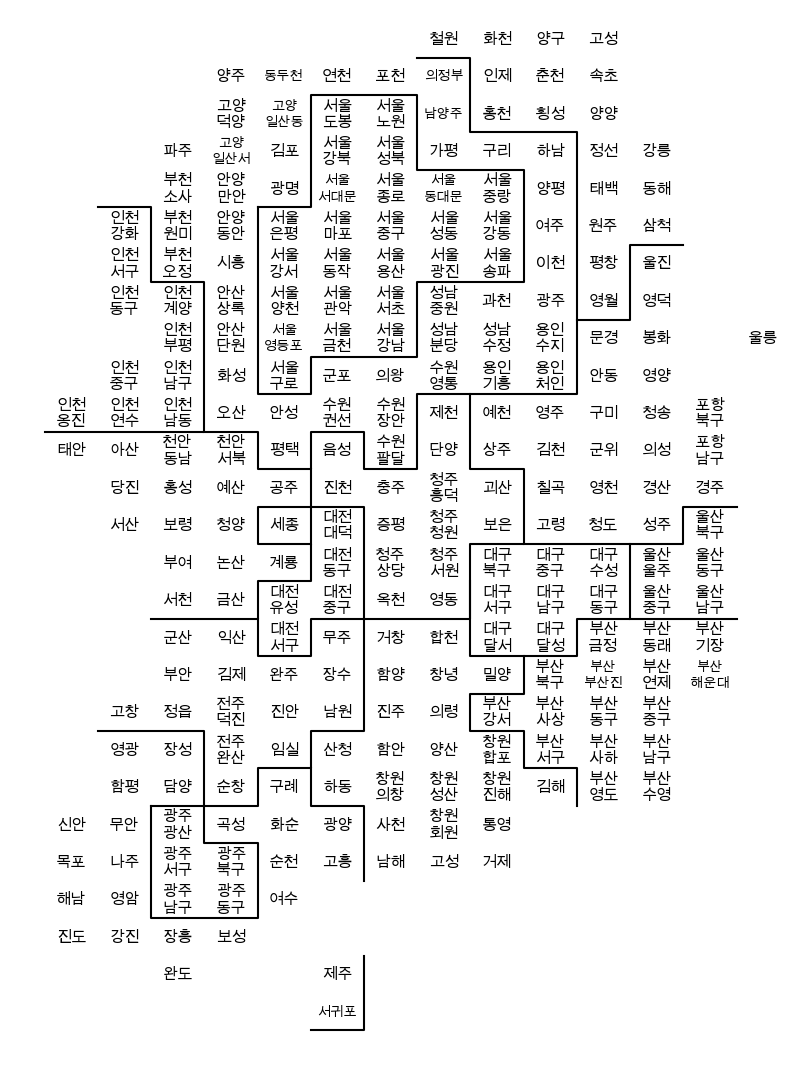

In [50]:
simple_draw(draw_korea)

### 인구현황 데이터(pop)와 지도 데이터(draw_korea)의 ID 일치 검증

In [52]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

{'고양',
 '부천',
 '성남',
 '수원',
 '안산',
 '안양',
 '용인',
 '전주',
 '창원',
 '천안',
 '청주',
 '포함 남구',
 '포함 북구',
 '포항'}

- 해당 지역들을 pop에서 삭제시켜주도록 하자

In [54]:
tmp_list = list(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"] == tmp].index)

print(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

set()


### 인구현황 데이터와 지도 데이터 merge

In [55]:
pop = pd.merge(pop, draw_korea, how='left', on='ID')

pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


### 배경에 맞춰 글씨 색상을 바꿔주는 함수 생성

In [57]:
def get_data_info(targetData, blockedMap) :
    # 글씨를 흰색으로 바꿔서 표시할 경계값
    # 색깔이 진한 배경에는 흰색 글씨를, 색깔이 연한 배경에는 검은색 글씨를 넣어줌
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)

    return mapdata, vmax, vmin, whitelabelmin

### 데이터의 범위가 음수~양수 값 사이인 경우 0을 중앙값으로 맞춰주는 함수 생성

In [65]:
def get_data_info_zero_center(targetData, blockedMap) :
    whitelabelmin = 5

    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )

    vmin, vmax = -tmp_max, tmp_max
    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)

    return mapdata, vmax, vmin, whitelabelmin

In [59]:
# plot_text_simple 함수 수정
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row["ID"].split()) == 2:
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        else:
            dispname = row["ID"]
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        # 색깔 지정
        # whitelabelmin보다 크면 흰색 글씨, 작으면 검정색 글씨
        annocolor = "white" if np.abs(row[targetData]) > whitelabelmin else "black"
        
        plt.annotate(
            dispname,
            (row["x"] + 0.5, row["y"] + 0.5),
            weight="bold",
            color=annocolor,# 색깔 지정
            fontsize=fontsize,
            linespacing=linespacing,
            ha="center", 
            va="center", 
        )

In [68]:
# simple_draw 함수 수정
def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    
    # 0을 중앙값으로 맞출건지에 따른 함수 적용
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_zero_center(targetData, blockedMap)
    
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
        
    plt.figure(figsize=(8, 11))
    # 지도에 배경 색상 그려주기                                     가장자리 색상(회색)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    
    # 지도에 지역 이름 써주기
    plot_text(targetData, blockedMap, whitelabelmin)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c="black", lw=1.5)
    
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    cb = plt.colorbar(shrink=0.1, aspect=10) # 컬러바 추가
    cb.set_label(targetData) # 컬러바 추가
    plt.show()

- "인구수합계" 지도 시각화

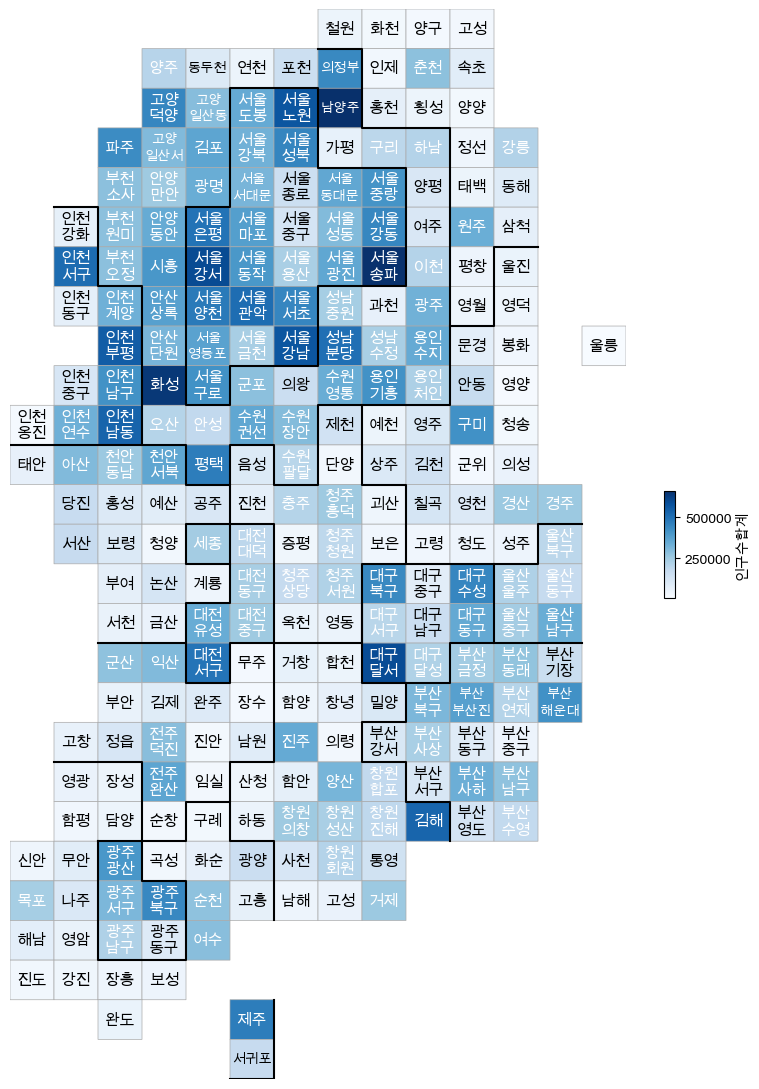

In [69]:
drawKorea("인구수합계", pop, "Blues")

- "소멸위기지역" 지도 시각화

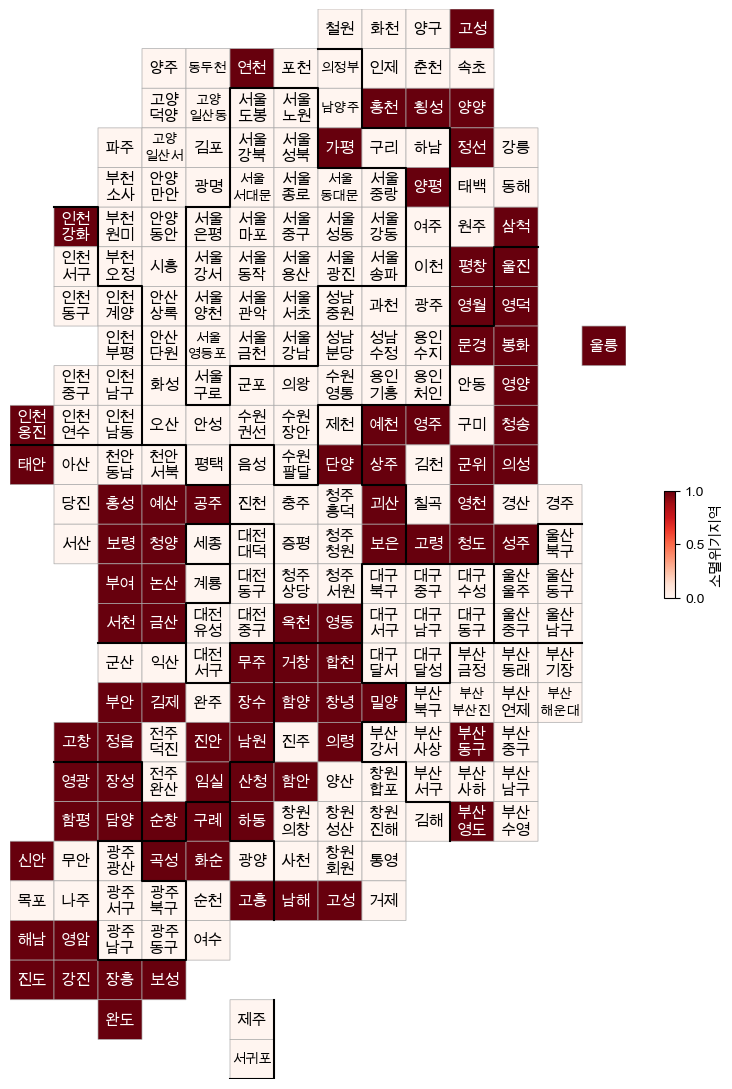

In [70]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop["소멸위기지역"]]

drawKorea("소멸위기지역", pop, "Reds")

- '여성비' 지도 시각화

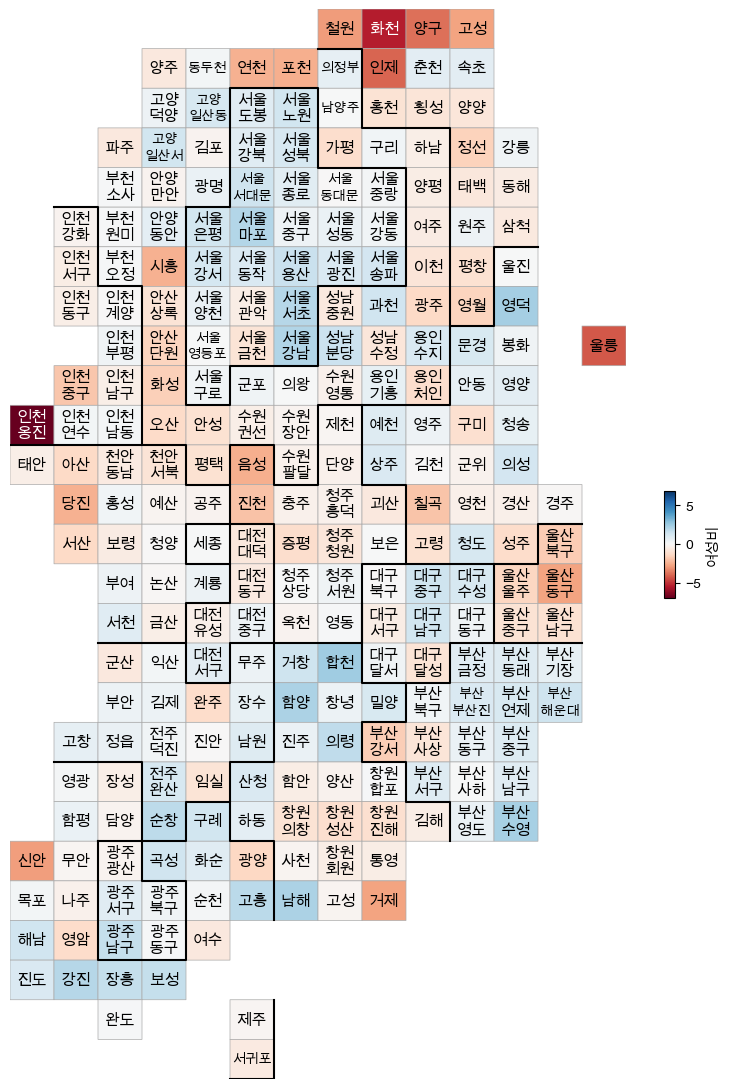

In [71]:
pop["여성비"] = (pop["인구수여자"] / pop["인구수합계"] - 0.5) * 100
drawKorea("여성비" , pop, "RdBu", zeroCenter=True)

- '2030여성비' 지도 시각화

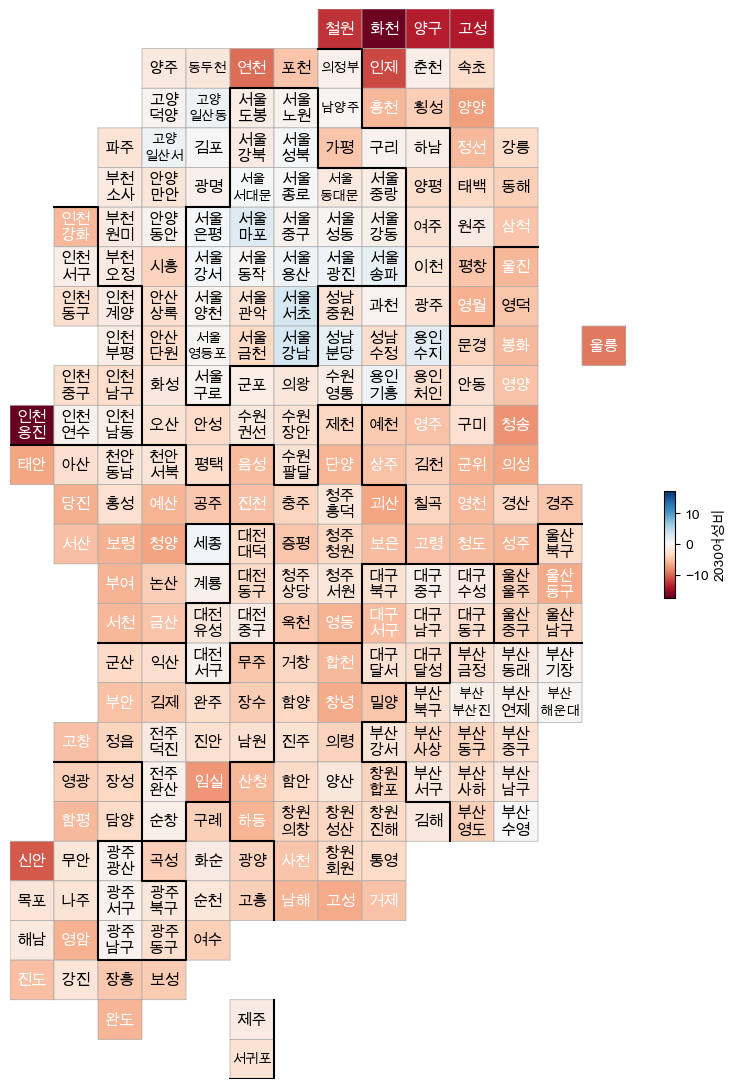

In [74]:
pop["2030여성비"] = (pop["20~39세여자"] / pop["20~39세합계"] - 0.5) * 100
drawKorea("2030여성비" , pop, "RdBu", zeroCenter = True)

---
## 4. folium 지도 시각화

In [76]:
import folium
import json

geo_path = "../data/data07/07_skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


- '인구수합계' 지도 시각화

In [79]:
mymap = folium.Map(location = [36.2002,127.054], zoom_start = 7)
folium.Choropleth(
    geo_data = geo_str,
    data = pop_folium["인구수합계"],
    key_on = "feature.id",
    columns = [pop_folium.index, pop_folium["인구수합계"]],
    fill_color = "YlGnBu"
).add_to(mymap)

mymap

- '소멸위기지역' 지도 시각화

In [82]:
mymap = folium.Map(location = [36.2002,127.054], zoom_start = 7)
folium.Choropleth(
    geo_data = geo_str,
    data = pop_folium["소멸위기지역"],
    key_on = "feature.id",
    columns = [pop_folium.index, pop_folium["소멸위기지역"]],
    fill_color = "PuRd"
).add_to(mymap)

mymap